# **Modelling and Evaluation**

## Objectives

* Fulfill Business Requirement 2 - The client is interested in predicting whether a given breast ultrasound is normal benign or malignant.

## Inputs

* inputs/breast_cancer_dataset/ultrasound_images/train
* inputs/breast_cancer_dataset/ultrasound_images/validation
* inputs/breast_cancer_dataset/ultrasound_images/test

## Outputs

* Label Balancing.
* Image Augmentation.
* Image distribution plot, train vs validation vs test.
* Machine learning model creation and training.
* Plotting model performance.
* Prediction of a selected image file.


---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/breast-cancer-detection/jupyter_notebooks'

In [2]:
os.chdir("/workspace/breast-cancer-detection")
print("You set a new current directory.")

You set a new current directory.


In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/breast-cancer-detection'

### Set Input Directories

In [4]:
data_dir = "inputs/breast_cancer_dataset/ultrasound_images"
train_path = data_dir + "/train"
validation_path = data_dir + "/validation"
test_path = data_dir + "/test"

### Set Output Directory

In [6]:
version = "v2"
file_path = f"outputs/{version}"
if "outputs" in os.listdir(current_dir) and version in os.listdir(current_dir + "/outputs"):
    print("This directory exists, create a new version.")
else:
    os.makedirs(name=file_path)

### Set Label Names

In [25]:
labels = os.listdir(train_path)
print("The image labels are", labels)
test_set = os.listdir(test_path)
validation_set = os.listdir(validation_path)

The image labels are ['benign', 'malignant', 'normal']


### Import Image Shape

In [8]:
import joblib

image_shape = joblib.load(filename=f"outputs/v1/image_shape_embed.pkl")
image_shape

(503, 615, 1)

# Imports

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Label Frequency in Train Set

Benign is notably far more frequent than the other classes. The dataset is unbalanced which will mean the ML model will have poorer performance for the other two classes.

/tmp/ipykernel_885/1769705413.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label_frequency = df_label_frequency.append(pd.Series(data={"Labels": label,
/tmp/ipykernel_885/1769705413.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label_frequency = df_label_frequency.append(pd.Series(data={"Labels": label,
/tmp/ipykernel_885/1769705413.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label_frequency = df_label_frequency.append(pd.Series(data={"Labels": label,
/tmp/ipykernel_885/1769705413.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label_frequency = df_label_frequency.append(pd.Series(data={"Labels": lab

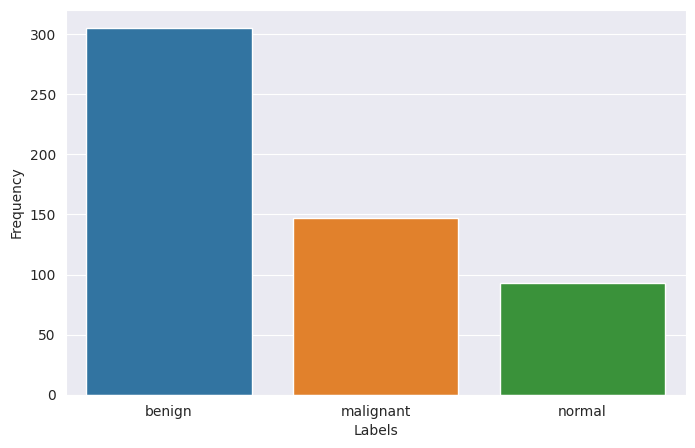

In [32]:
df_label_frequency = pd.DataFrame([])
for label in labels:
    for file in os.listdir(train_path + "/" + label):
        count = int(len(os.listdir(train_path + "/" + label)))
        df_label_frequency = df_label_frequency.append(pd.Series(data={"Labels": label,
                                                                       "Frequency": count}),
                                                        ignore_index=True
                                                        
        )

sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_label_frequency, x='Labels', y='Frequency')
plt.show()


# Label Balancing

Section 1 content

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
